<a href="https://colab.research.google.com/github/gangerz/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_01_DNN%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EB%A0%88%EC%9D%B4%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. DNN기초 - 기본 레이어
---
* 날짜: 2022-06-30
* 이름: 윤예현

## 학습내용
    - 딥러닝을 구성하는 레이어에 대해 이해한다.
    - 활성화 함수 종류를 구현하고 특징을 정리한다.
    - 그래디언트 소실에 대해 이해한다.

## 학습자료


- 케라스 창시자에게 배우는 딥러닝


In [13]:
import numpy as np
import matplotlib.pyplot as plt

## 선형 함수 (Linear)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-07.png?raw=true width=700>



### **| 모델 생성**

In [16]:
class Linear():
  def __init__(self, input_d,output_d):
    W_shape = (input_d,output_d)
    self.W = np.random.normal(size = W_shape)      #랜덤한 값을 가지고. shape는 W shape인 행렬
    self.B = np.random.normal(size = output_d) 
#w를 곱하고, b를 더한다.
  def forward(self,X):
    # X: (n_sample, input_d)

    return X@self.W + self.B  #@는 행렬 곱

  #직접 학습파라미터 설정
  def set_weights(self,param_list):
    self.W = param_list[0]
    self.B = param_list[1]
    
linear1 = Linear(3,3)
print(linear1.W,linear1.B)
linear2 = Linear(3,2)
print(linear2.W,linear2.B)

X = np.array([[1,2,1]])
print(X,X.shape)
print(f'첫번째 레이어 계산결과 : {linear1.forward(X)}')
print(f'두번째 레이어 계산결과 : {linear2.forward(linear1.forward(X))}')

[[-0.82495397 -0.10760984  0.2249699 ]
 [-0.29676653 -1.6205961  -0.25226112]
 [ 0.40706039  1.80488618  0.83333256]] [ 1.74394377 -0.13951945 -1.05059634]
[[-1.4400692   0.44262359]
 [-1.2776593  -0.27701036]
 [-1.67954925 -2.0009539 ]] [1.04832283 2.10794572]
[[1 2 1]] (1, 3)
첫번째 레이어 계산결과 : [[ 0.73251713 -1.68343531 -0.49681612]]
두번째 레이어 계산결과 : [[2.97873139 3.89261025]]


* 모델 불러오기

### **| 순전파 계산**

데이터와 학습파라미터의 값이 아래와 같을 때 Y값을 구하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-11.png?raw=true width=800>
</p>

* 파라미터 정의

In [25]:
X = np.array([[1,2,1]])
print(X,X.shape)
W1 = np.array([1,1,-1,1,0.5,-1,1,1,1]).reshape(3,3)
B1 = np.array([0,0,0]).reshape(1,3)
W2 = np.array([1,0.5,-1,0.5,0,1]).reshape(3,2)
B2 = np.array([1,-0.5]).reshape(1,2)
print(W1)
print(B1)
print(W2)
print(B2)

[[1 2 1]] (1, 3)
[[ 1.   1.  -1. ]
 [ 1.   0.5 -1. ]
 [ 1.   1.   1. ]]
[[0 0 0]]
[[ 1.   0.5]
 [-1.   0.5]
 [ 0.   1. ]]
[[ 1.  -0.5]]


* 학습 파라미터 확인

In [30]:
linear1 = Linear(3,3)
print(linear1.W,linear1.B)
linear2 = Linear(3,2)
print(linear2.W,linear2.B)


[[ 0.8484842   0.88224357  0.34832317]
 [-1.77807772 -0.13890833  0.44544527]
 [-0.70181693  0.84320311  0.41228041]] [ 0.37324401  0.27865877 -1.73166245]
[[ 0.42338047 -0.95173925]
 [ 0.98792081  0.36929359]
 [-0.14167865  0.3692472 ]] [-0.56212899 -0.06261616]


* 예측 (순전파)

In [33]:

X = np.array([[1,2,1]])
print(X,X.shape)
print(f'첫번째 레이어 계산결과 : {linear1.forward(X)}')
print(f'두번째 레이어 계산결과 : {linear2.forward(linear1.forward(X))}')

[[1 2 1]] (1, 3)
첫번째 레이어 계산결과 : [[ 4.  3. -2.]]
두번째 레이어 계산결과 : [[2. 1.]]


* 학습 파라미터 세팅

In [32]:
linear1.set_weights([W1,B1])
linear2.set_weights([W2,B2])

print(linear1.W,linear1.B)
print(linear2.W,linear2.B)

[[ 1.   1.  -1. ]
 [ 1.   0.5 -1. ]
 [ 1.   1.   1. ]] [[0 0 0]]
[[ 1.   0.5]
 [-1.   0.5]
 [ 0.   1. ]] [[ 1.  -0.5]]


## 활성 함수 (Activation)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-08.png?raw=true width=800>

* 비선형 함수를 사용하는 이유

> 선형함수인 $h(x)=cx$를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요.
이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이는 실은 $y(x)=ax$와 똑같은 식입니다.
$a=c3$이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다.
뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. **출처: [밑바닥부터 시작하는 딥러닝]**
 
* 어떤 활성화 함수를 써야할까

> ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용하라는 얘기도 있고, cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.
**출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR:티스토리]**

* 딥러닝에서 사용되는 활성화 함수의 종류

```
- Step Function
- Sigmoid
- Softmax
- Tanh
- ReLU
- Leaky ReLU
- PReLU
- ELU
```


* 시각화를 위한 플롯팅 함수

In [65]:
plt.rcParams['figure.figsize'] = (8, 2)
def plot_func(xs, ys, title=''):
  plt.plot(xs, ys)
  plt.title(title)
  plt.ylim(-1, 2)
  plt.hlines(xmin=-5, xmax=5, y=0, colors='r', linestyles=':')
  plt.vlines(ymin=-1, ymax=2, x=0, colors='r', linestyles=':')
  plt.grid()

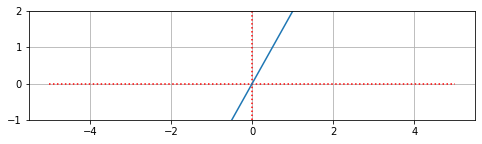

In [66]:
plot_func([-1,0,1],[-2,0,2])

### **| Sigmoid**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-15.png?raw=true width=500>





* 구현
\begin{align}
sigmoid(x) = \frac{1}{1+e^{-x}}
\end{align}


In [39]:
def sigmoid(x):
  return 1/(1+np.exp(-x)) #np.exp(-x) = 2.71/1**(-x)

* 미분
\begin{align}
\frac{d}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}


In [40]:
def sigmoid_grad(x):
  return sigmoid(x) * (1-sigmoid(x))

* 시각화

Text(0.5, 1.0, 'sigmoid(dev)')

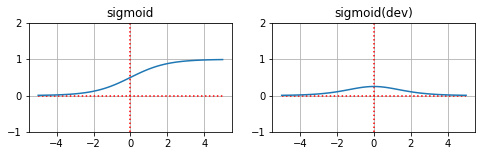

In [67]:
xs = np.linspace(-5,5,100) # -3~3까지의 값 100개를 

#sigmoid(np.array(xs))

plt.subplot(121);plot_func(xs, sigmoid(xs));plt.title('sigmoid')
plt.subplot(122);plot_func(xs, sigmoid_grad(xs));plt.title('sigmoid(dev)')



**Sigmoid 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```


### **| Softmax**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-16.png?raw=true width=550>


* 구현

\begin{align}
softmax(x) = \frac{e^{x_i}}{\sum_je^{x_j}}
\end{align}

In [70]:
def softmax(x_vec):
  step1 = np.exp(x_vec)
  step2 = np.sum(step1)
  return step1/step2


x_vec = np.array([1,2,0])
y_vec = softmax(x_vec)
print(y_vec, np.sum(y_vec))

[0.24472847 0.66524096 0.09003057] 1.0


* 미분


\begin{align}
\frac{x}{dx} Softmax(\vec{x}) =  
\begin{cases}
& Softmax(\vec{x})(1-Softmax(\vec{x})) \;\;\;\;\;\;\; \text{ if } i=j  
\\ & 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } i\neq j 
\end{cases}
\end{align}

* 시각화


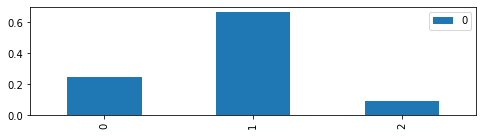

In [71]:
import pandas as pd

pd.DataFrame(y_vec).plot(kind='bar')


**Softmax 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```


### **| Tanh**



* 구현

\begin{align}
tanh(x) = \frac{e^x - e^{-x}}{e^{x}+e^{-x}}
\end{align}

In [80]:
def tanh(x):
  step3 = np.exp(x)-np.exp(-x)
  step4 = np.exp(x)+np.exp(-x)
  return step3/step4

* 미분


\begin{align}
\frac{d}{dx} tanh(x) = (1-tanh(x))(1+tanh(x))) = 1-tanh(x)^2
\end{align}

In [81]:
def tanh_grad(x):
  return (1-tanh(x)) * (1+tanh(x))

* 시각화

Text(0.5, 1.0, 'tanh')

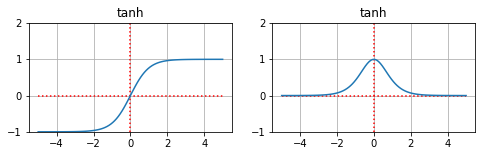

In [83]:
xs = np.linspace(-5,5,100) 



plt.subplot(121);plot_func(xs, tanh(xs));plt.title('tanh')
plt.subplot(122);plot_func(xs, tanh_grad(xs));plt.title('tanh')


**Tanh 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| ReLU**


* 구현

\begin{align}
ReLU(x) = max(0, x)
\end{align}




\begin{align}
ReLU(x) =  
\begin{cases}
& x \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [84]:
def ReLU(x):
  #return np.maximum(0,x)
  return np.where(x>=0,x,0)

* 미분


\begin{align}
\frac{x}{dx} ReLU(x) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}


In [85]:
def ReLU_grad(x):
  return np.where(x>=0,1,0)

* 시각화

Text(0.5, 1.0, 'ReLU_grad')

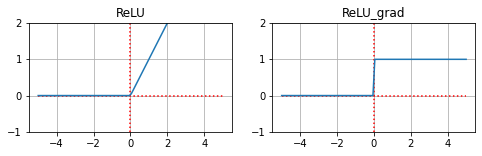

In [86]:
xs = np.linspace(-5,5,100) 



plt.subplot(121);plot_func(xs, ReLU(xs));plt.title('ReLU')
plt.subplot(122);plot_func(xs, ReLU_grad(xs));plt.title('ReLU_grad')



**ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| LeackyReLU & PReLU**



* 구현

\begin{align}
LeackyReLU(x) = max(0.01  x, x)
\\
\\
\end{align}



\begin{align}
PReLU(x;\alpha) = max(\alpha  x, x)
\end{align}


\begin{align}
PReLU(x) =  
\begin{cases}
& x \;\; \text{ if } x \geq 0  
\\ & \alpha x \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [87]:
def PReLU(x, alpha = 0.01):
  return np.where(x>=0, x, alpha*x)

* 미분

\begin{align}
\frac{x}{dx} PReLU(x;\alpha) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & \alpha \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [88]:
def PReLU_grad(x, alpha = 0.01):
  return np.where(x>=0, 1, alpha)

* 시각화
  * $\alpha$ 값이 각각 0.01, 0.1, 0.2 일때 플롯을 그리세요.

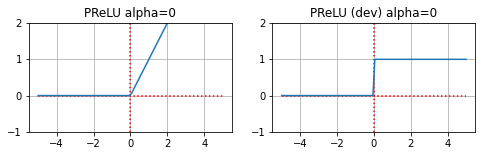

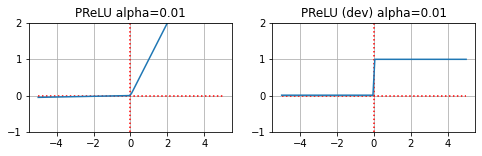

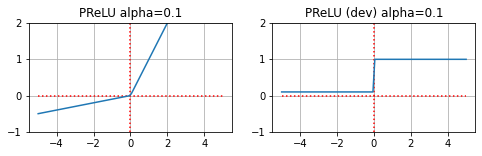

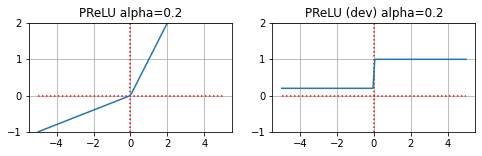

In [93]:
xs = np.linspace(-5,5,100) 


for a in [0, 0.01, 0.1, 0.2]:
  plt.subplot(121);plot_func(xs, PReLU(xs, alpha =a));plt.title(f'PReLU alpha={a}')
  plt.subplot(122);plot_func(xs, PReLU_grad(xs, alpha =a));plt.title(f'PReLU (dev) alpha={a}')
  plt.show()



**LeackReLU및 PReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



### **| ELU & SELU**


\begin{align}
ELU(x) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & (e^x-1) \;\;\;\;\;\; \text{ if } x <0  
\end{cases}
\\
\\
\end{align}



\begin{align}
SELU(x;\alpha) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha(e^x-1) \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 구현

In [103]:
def SELU(x, alpha):
  return np.where(x>=0, x, np.exp(x)-1)

* 미분

\begin{align}
\frac{x}{dx} ELU(x;\alpha) =  
\begin{cases}
& 1 \;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha e^{x} \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [104]:
def SELU_grad(x, alpha):
    return np.where(x>=0, 1, alpha * np.exp(x))

* 시각화
  * $\alpha$ 값이 각각 0.1, 1, 2 일때 플롯을 그리세요.

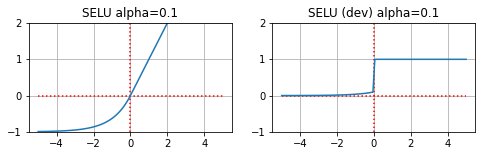

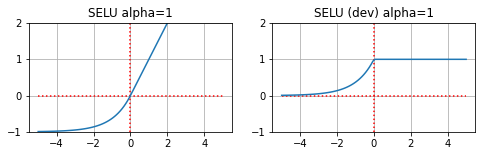

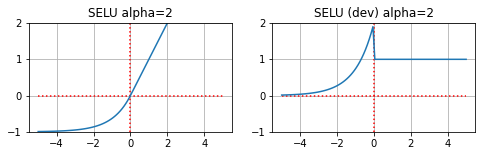

In [105]:
xs = np.linspace(-5,5,100) 


for a in [0.1, 1, 2]:
  plt.subplot(121);plot_func(xs, SELU(xs, alpha =a));plt.title(f'SELU alpha={a}')
  plt.subplot(122);plot_func(xs, SELU_grad(xs, alpha =a));plt.title(f'SELU (dev) alpha={a}')
  plt.show()



**ELU 및 ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



## 그래디언트 소실 (Vaniching Gradient)
---
다음 질문에 답할 수 있도록 내용을 정리하세요.

1. 그래디언트 소실 개념
2. 딥러닝에서 그래디언트 값이 중요한 이유
3. 그래디언트 소실을 방지하기 위한 딥러닝 기법

```


```